In [1]:
import path
from libs.formula2 import Formula
import libs.checker as checker
from control import *
from z3 import *
from scipy.signal import lti, step
import scipy.signal as sig
from matplotlib import pyplot as p

This example is borrowed and adapted from [1], which demonstrates a hybrid system design of a PD controller that drives a car to a desired position *r*, the design needs to satisfy a safety requirment: it never cross the desired position.

Using our numerical static checking, the design is found that doesn't met the safety requirement. In this case, our checker return *sat* and a counter example.

This example also shows that it is advisble to use a numerical checker instead of symbolic checker for a full hybrid design, as it avoids complex computation and possible fruitless searching by SMT solving (example can be found in ex.car.sym.unknown.ipynb).

[1] Jan-David Quesel, Stefan Mitsch, Sarah Loos, Nikos Aréchiga, and André Platzer. How to model and prove hybrid systems with KeYmaera: A tutorial on safety. STTT 18(1), pp. 67-91, 2016.

In [2]:
# Constants
Kp = 2
Kd = 0.14
r = 1

In [3]:
# Original Transfer function
Hs_num = [Kd, Kp]
Hs_den = [1, Kd, Kp]
Hs = lti(Hs_num, Hs_den)
t, s = step(Hs)

# Approximated transfer function
Hs_hat_num = [Kp]
Hs_hat_den = [1, Kd, Kp]
Hs_hat = lti(Hs_hat_num, Hs_hat_den)
t2, s2 = step(Hs_hat)

As the original one *Hs* is not a standard 2nd-order transfer function, we approximate *Hs* to *Hs_hat* (2nd-order). Then, we can perform time-domain metrics estimations and static checking on *Hs_hat*.Ideally, the appxoimated transfer function should preserve the main characteristics of the original one. Otherwise, the estimations and static checking result on *Hs_hat* would not be representatitive for *Hs*. Thus, let's have a look the step response of the two transfer function.

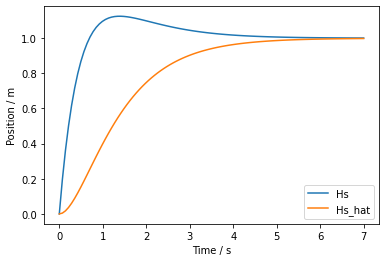

In [4]:
p.plot(t, s, label='Hs')
p.plot(t2,s2, label='Hs_hat')
p.xlabel('Time / s')
p.ylabel('Position / m')
p.legend()
p.show()

The plot showing that *Hs_hat* is a close approximation of *Hs*.

Next, let us static check the design *Hs_hat* against its desired safety requirement.

In [5]:
# Chars calculation
wn_square = Hs_hat_den[-1]
two_zeta_wn = Hs_hat_den[-2]

omega_n = math.sqrt(wn_square)
zeta = two_zeta_wn/(2*omega_n)

print(f'zeta = {zeta}, omega_n = {omega_n}')


zeta = 1.0606601717798212, omega_n = 1.4142135623730951


In [6]:
# Setup
c = checker.Checker(zeta,omega_n)

p = c.factory.y
t = c.factory.t
r = c.amp
safety = p[t] <= r

c.auto_pog(safety)


<ipython-input-7-0fd1e298b267>:5: RuntimeWarning: divide by zero encountered in true_divide
  y = numpy.sqrt((1/x**2)-1)


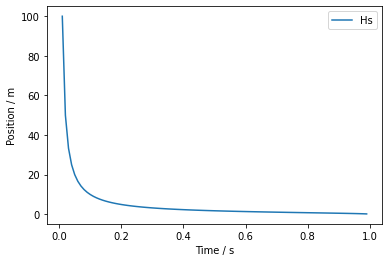

In [7]:
import numpy 

x = numpy.linspace(0,0.99,100)
pow = (- numpy.pi * x) / (numpy.sqrt(1-x**2))
y = numpy.sqrt((1/x**2)-1)
from matplotlib import pyplot as p
p.plot(x, y, label='Hs')
p.xlabel('Time / s')
p.ylabel('Position / m')
p.legend()
p.show()

In [8]:
import numpy 

x = 0.078125
pow = (- numpy.pi * x) / (numpy.sqrt(1-x**2))
ovst =  numpy.exp(pow)
print(ovst)

0.7817741535389658
